In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from alarmnetclass import AlarmNet  # Assuming this is the AlarmNet class from earlier
from federatedLearn import FederatedLearning
from torch import nn

In [2]:
path = 'smoke_detection_iot.csv'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load and preprocess the data
data = pd.read_csv(path).drop(['Unnamed: 0', 'UTC', 'CNT'], axis=1)
Y_df = data['Fire Alarm']
X_df = data.drop('Fire Alarm', axis=1)

Y_test_raw = X_df.values
Y_raw = Y_df.values

# Split data into train and test
X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(Y_test_raw, Y_raw, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(X_train_raw)
X_test_raw = scaler.transform(X_test_raw)

# Convert to torch tensors
X_train = torch.tensor(X_train_raw, dtype=torch.float32)
X_test = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.5005
Client 1 - Epoch 200/600, Loss: 0.1566
Client 1 - Epoch 300/600, Loss: 0.0970
Client 1 - Epoch 400/600, Loss: 0.0738
Client 1 - Epoch 500/600, Loss: 0.0587
Client 1 - Epoch 600/600, Loss: 0.0482
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9675698741199061, 'recall': 0.9563475326866301, 'f1-score': 0.9619259730618305, 'support': 4742.0}, '1.0': {'precision': 0.9827701015481938, 'recall': 0.9872899071828748, 'f1-score': 0.9850248195887039, 'support': 11959.0}, 'accuracy': 0.9785042811807676, 'macro avg': {'precision': 0.97516998783405, 'recall': 0.9718187199347524, 'f1-score': 0.9734753963252671, 'support': 16701.0}, 'weighted avg': {'precision': 0.9784542235489757, 'recall': 0.9785042811807676, 'f1-score': 0.9784662464355732, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4535   207]
 [  152 11807]]
Client 2 - Epoch 100/600, Loss: 0.5635
Client 2 - Epoch 200/600

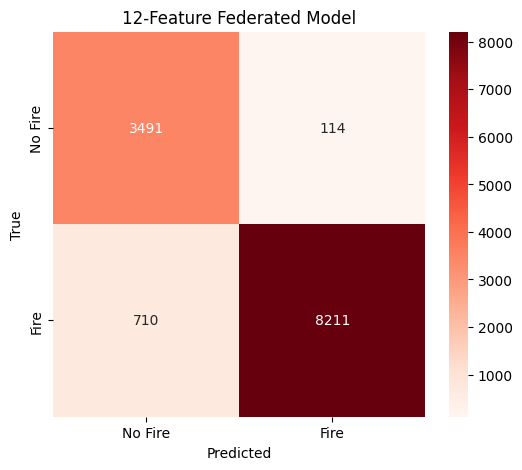


--- Client Reports ---
{'0.0': {'precision': 0.9675698741199061, 'recall': 0.9563475326866301, 'f1-score': 0.9619259730618305, 'support': 4742.0}, '1.0': {'precision': 0.9827701015481938, 'recall': 0.9872899071828748, 'f1-score': 0.9850248195887039, 'support': 11959.0}, 'accuracy': 0.9785042811807676, 'macro avg': {'precision': 0.97516998783405, 'recall': 0.9718187199347524, 'f1-score': 0.9734753963252671, 'support': 16701.0}, 'weighted avg': {'precision': 0.9784542235489757, 'recall': 0.9785042811807676, 'f1-score': 0.9784662464355732, 'support': 16701.0}}
{'0.0': {'precision': 0.9620225694444444, 'recall': 0.94803250641574, 'f1-score': 0.9549763033175356, 'support': 4676.0}, '1.0': {'precision': 0.9799057305879434, 'recall': 0.9854469854469855, 'f1-score': 0.9826685463139564, 'support': 12025.0}, 'accuracy': 0.9749715585893061, 'macro avg': {'precision': 0.9709641500161938, 'recall': 0.9667397459313627, 'f1-score': 0.968822424815746, 'support': 16701.0}, 'weighted avg': {'precision'

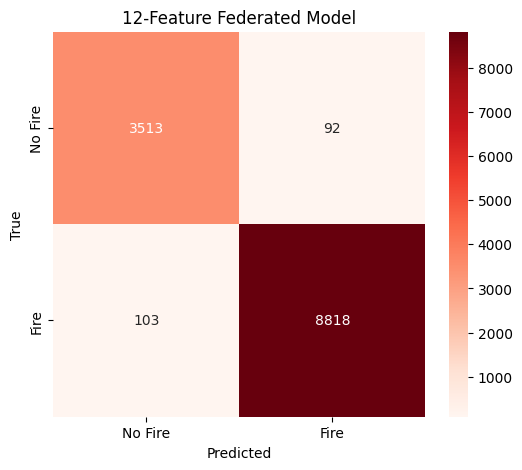


--- Client Reports ---
{'0.0': {'precision': 0.9707614640302903, 'recall': 0.9732180514550822, 'f1-score': 0.9719882055602359, 'support': 4742.0}, '1.0': {'precision': 0.9893697162467565, 'recall': 0.9883769545948657, 'f1-score': 0.9888730862544968, 'support': 11959.0}, 'accuracy': 0.9840728100113766, 'macro avg': {'precision': 0.9800655901385233, 'recall': 0.980797503024974, 'f1-score': 0.9804306459073664, 'support': 16701.0}, 'weighted avg': {'precision': 0.9840861804099514, 'recall': 0.9840728100113766, 'f1-score': 0.984078876072341, 'support': 16701.0}}
{'0.0': {'precision': 0.9785499785499786, 'recall': 0.9756201881950385, 'f1-score': 0.9770828871278646, 'support': 4676.0}, '1.0': {'precision': 0.9905307749813107, 'recall': 0.9916839916839917, 'f1-score': 0.9911070478723404, 'support': 12025.0}, 'accuracy': 0.9871863960241901, 'macro avg': {'precision': 0.9845403767656447, 'recall': 0.9836520899395151, 'f1-score': 0.9840949675001025, 'support': 16701.0}, 'weighted avg': {'precisi

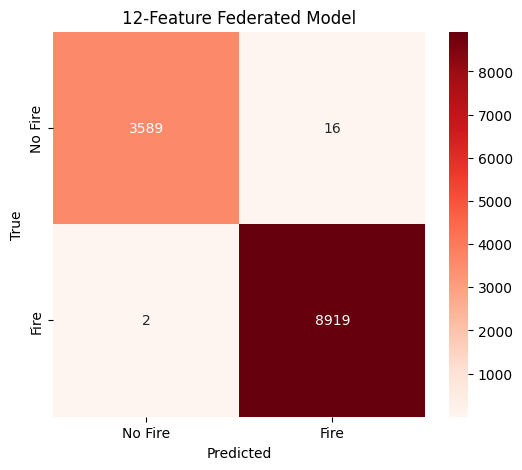


--- Client Reports ---
{'0.0': {'precision': 0.9997888513513513, 'recall': 0.9985238296077604, 'f1-score': 0.9991559400717451, 'support': 4742.0}, '1.0': {'precision': 0.9994149603008775, 'recall': 0.9999163809683084, 'f1-score': 0.9996656077579, 'support': 11959.0}, 'accuracy': 0.9995209867672594, 'macro avg': {'precision': 0.9996019058261144, 'recall': 0.9992201052880344, 'f1-score': 0.9994107739148226, 'support': 16701.0}, 'weighted avg': {'precision': 0.99952112109133, 'recall': 0.9995209867672594, 'f1-score': 0.9995208952156723, 'support': 16701.0}}
{'0.0': {'precision': 0.9995716427500535, 'recall': 0.9980752780153977, 'f1-score': 0.9988228999464954, 'support': 4676.0}, '1.0': {'precision': 0.999251994680851, 'recall': 0.9998336798336799, 'f1-score': 0.9995427526291724, 'support': 12025.0}, 'accuracy': 0.9993413568049817, 'macro avg': {'precision': 0.9994118187154523, 'recall': 0.9989544789245388, 'f1-score': 0.999182826287834, 'support': 16701.0}, 'weighted avg': {'precision': 

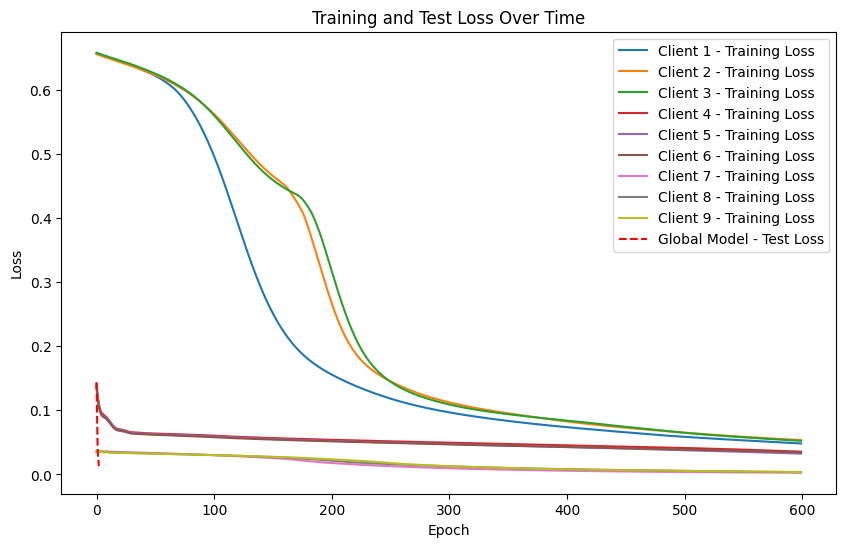

Accuracy: 0.9985629889829155
Precision: 0.9982092893116956
Recall: 0.9997758098867839
F1: 0.998991935483871
Confusion_matrix:
[[3589   16]
 [   2 8919]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3589   16]
 [   2 8919]]


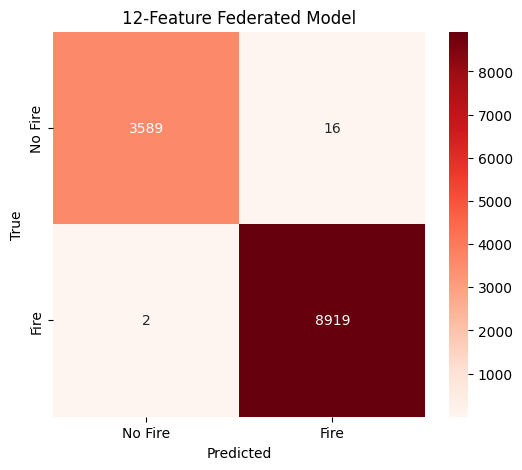

In [3]:
full_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

full_federated_system = FederatedLearning(full_global_model, n_clients=3)

#federated_system.dump_data_to_csv(X_train, Y_train, output_dir='client_data')

full_federated_system.split_data(X_train, Y_train)
full_federated_system.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test,Y_test=Y_test, conf_title = "12-Feature Federated Model")

full_federated_system.evaluate_global_model(X_test, Y_test, conf_title = "12-Feature Federated Model")

In [4]:
corr = np.abs(data.corr())
ranking = corr['Fire Alarm'].sort_values(ascending=False)[1:]
print(ranking)

num_drops = 8
remaining_features = ranking.index[:-num_drops]


X_df_dropped = data[remaining_features]
print('Remaining features:', X_df_dropped.columns)
X_train_dropped, X_test_dropped, Y_train_dropped, Y_test_dropped = train_test_split(X_df_dropped.values, Y_raw, test_size=0.2, random_state=0)

X_train_dropped = scaler.fit_transform(X_train_dropped)
X_test_dropped = scaler.transform(X_test_dropped)

Humidity[%]       0.399846
Raw Ethanol       0.340652
Pressure[hPa]     0.249797
TVOC[ppb]         0.214743
Temperature[C]    0.163902
NC0.5             0.128118
PM1.0             0.110552
Raw H2            0.107007
eCO2[ppm]         0.097006
PM2.5             0.084916
NC1.0             0.082828
NC2.5             0.057707
Name: Fire Alarm, dtype: float64
Remaining features: Index(['Humidity[%]', 'Raw Ethanol', 'Pressure[hPa]', 'TVOC[ppb]'], dtype='object')


--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.3814
Client 1 - Epoch 200/600, Loss: 0.1898
Client 1 - Epoch 300/600, Loss: 0.0951
Client 1 - Epoch 400/600, Loss: 0.0638
Client 1 - Epoch 500/600, Loss: 0.0439
Client 1 - Epoch 600/600, Loss: 0.0303
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9920940170940171, 'recall': 0.9791227330240405, 'f1-score': 0.9855656973041818, 'support': 4742.0}, '1.0': {'precision': 0.9917644122785126, 'recall': 0.9969060958274103, 'f1-score': 0.9943286071726438, 'support': 11959.0}, 'accuracy': 0.9918567750434105, 'macro avg': {'precision': 0.9919292146862648, 'recall': 0.9880144144257255, 'f1-score': 0.9899471522384128, 'support': 16701.0}, 'weighted avg': {'precision': 0.9918579986526892, 'recall': 0.9918567750434105, 'f1-score': 0.9918405095379964, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4643    99]
 [   37 11922]]
Client 2 - Epoch 100/600, Loss: 0.3799
Client 2 - Epoch 200/6

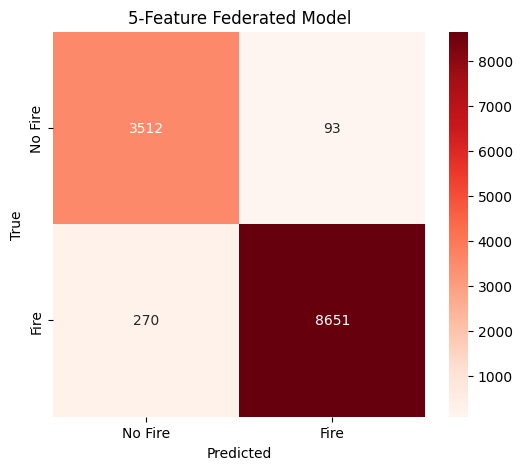


--- Client Reports ---
{'0.0': {'precision': 0.9920940170940171, 'recall': 0.9791227330240405, 'f1-score': 0.9855656973041818, 'support': 4742.0}, '1.0': {'precision': 0.9917644122785126, 'recall': 0.9969060958274103, 'f1-score': 0.9943286071726438, 'support': 11959.0}, 'accuracy': 0.9918567750434105, 'macro avg': {'precision': 0.9919292146862648, 'recall': 0.9880144144257255, 'f1-score': 0.9899471522384128, 'support': 16701.0}, 'weighted avg': {'precision': 0.9918579986526892, 'recall': 0.9918567750434105, 'f1-score': 0.9918405095379964, 'support': 16701.0}}
{'0.0': {'precision': 0.9734816082121471, 'recall': 0.9734816082121471, 'f1-score': 0.9734816082121471, 'support': 4676.0}, '1.0': {'precision': 0.9896881496881497, 'recall': 0.9896881496881497, 'f1-score': 0.9896881496881497, 'support': 12025.0}, 'accuracy': 0.9851505897850428, 'macro avg': {'precision': 0.9815848789501485, 'recall': 0.9815848789501485, 'f1-score': 0.9815848789501485, 'support': 16701.0}, 'weighted avg': {'preci

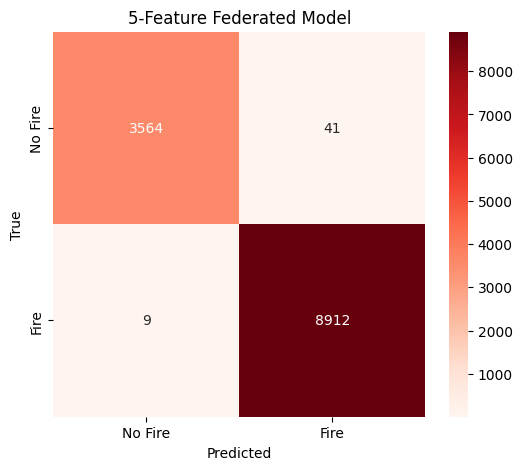


--- Client Reports ---
{'0.0': {'precision': 0.9993658845909955, 'recall': 0.9970476592155209, 'f1-score': 0.9982054259474296, 'support': 4742.0}, '1.0': {'precision': 0.9988304093567252, 'recall': 0.9997491429049251, 'f1-score': 0.9992895649630156, 'support': 11959.0}, 'accuracy': 0.9989820968804263, 'macro avg': {'precision': 0.9990981469738603, 'recall': 0.9983984010602229, 'f1-score': 0.9987474954552226, 'support': 16701.0}, 'weighted avg': {'precision': 0.9989824495675456, 'recall': 0.9989820968804263, 'f1-score': 0.9989817398500338, 'support': 16701.0}}
{'0.0': {'precision': 0.998286203941731, 'recall': 0.9965782720273738, 'f1-score': 0.997431506849315, 'support': 4676.0}, '1.0': {'precision': 0.9986703232776531, 'recall': 0.9993347193347193, 'f1-score': 0.9990024108404688, 'support': 12025.0}, 'accuracy': 0.9985629603017784, 'macro avg': {'precision': 0.998478263609692, 'recall': 0.9979564956810465, 'f1-score': 0.9982169588448919, 'support': 16701.0}, 'weighted avg': {'precisio

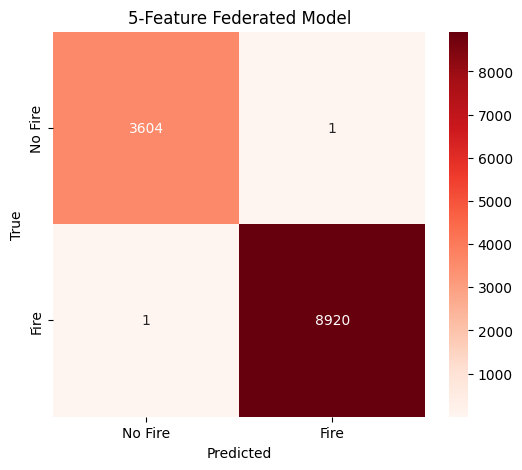


--- Client Reports ---
{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4742.0}, '1.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11959.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16701.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16701.0}}
{'0.0': {'precision': 0.9995723754543511, 'recall': 0.9997861420017109, 'f1-score': 0.9996792473003314, 'support': 4676.0}, '1.0': {'precision': 0.9999168330006654, 'recall': 0.9998336798336799, 'f1-score': 0.9998752546883446, 'support': 12025.0}, 'accuracy': 0.9998203700377223, 'macro avg': {'precision': 0.9997446042275082, 'recall': 0.9998099109176954, 'f1-score': 0.999777250994338, 'support': 16701.0}, 'weighted avg': {'precision': 0.9998203906626878, 'recall': 0.9998203700377223, 'f1-score': 0.9998203759058555, 'support': 16701.0}}
{'0.0': {'precision': 0.9997938144329896, 'recall': 0.9997938144329896, 'f1-score': 0.

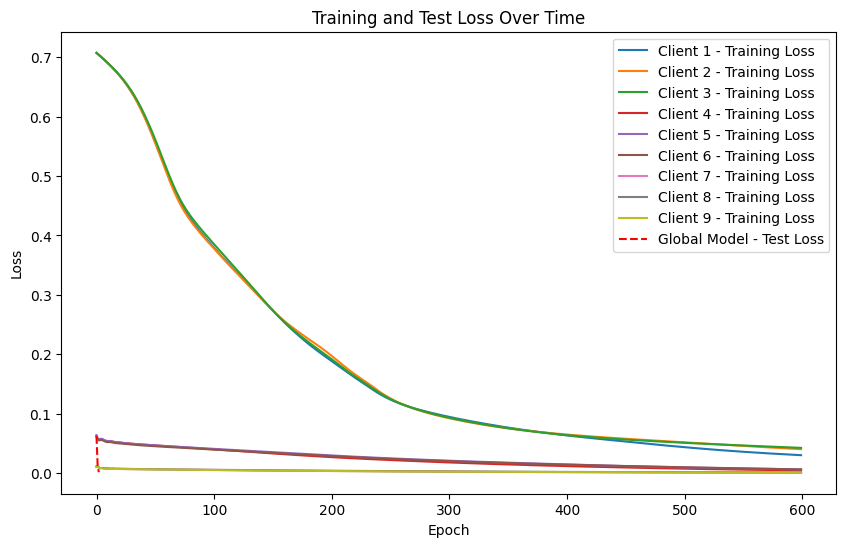

Accuracy: 0.9998403321092129
Precision: 0.999887904943392
Recall: 0.999887904943392
F1: 0.999887904943392
Confusion_matrix:
[[3604    1]
 [   1 8920]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3604    1]
 [   1 8920]]


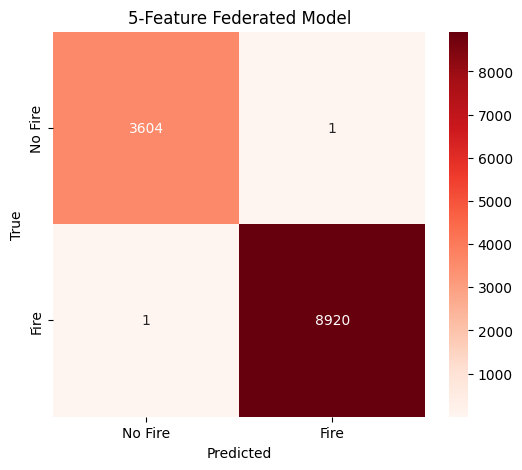

In [6]:
# Convert to torch tensors
X_train_dropped_device = torch.tensor(X_train_raw, dtype=torch.float32)
X_test_dropped_device = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train_dropped_device = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test_dropped_device = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

dropped_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

dropped5f_federated = FederatedLearning(dropped_global_model, n_clients=3)

dropped5f_federated.split_data(X_train_dropped_device, Y_train_dropped_device)
dropped5f_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test_dropped_device,Y_test=Y_test_dropped_device, conf_title="5-Feature Federated Model")

dropped5f_federated.evaluate_global_model(X_test_dropped_device, Y_test_dropped_device, conf_title="5-Feature Federated Model")

In [7]:
AlarmNet.compare_results(dropped_global_model.get_results(), full_global_model.get_results())

Comparing results:
accuracy: 0.1277547109549711 %
precision: 0.1678803817305291 %
recall: 0.01121076233184124 %
f1: 0.0896069904527646 %


In [8]:
import random
from sklearn.impute import SimpleImputer

--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.3762
Client 1 - Epoch 200/600, Loss: 0.1604
Client 1 - Epoch 300/600, Loss: 0.0911
Client 1 - Epoch 400/600, Loss: 0.0653
Client 1 - Epoch 500/600, Loss: 0.0533
Client 1 - Epoch 600/600, Loss: 0.0448
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9659835199661948, 'recall': 0.9641501476170392, 'f1-score': 0.965065963060686, 'support': 4742.0}, '1.0': {'precision': 0.9857954545454546, 'recall': 0.9865373358976504, 'f1-score': 0.9861662556944039, 'support': 11959.0}, 'accuracy': 0.9801808274953595, 'macro avg': {'precision': 0.9758894872558247, 'recall': 0.9753437417573447, 'f1-score': 0.975616109377545, 'support': 16701.0}, 'weighted avg': {'precision': 0.9801701510441762, 'recall': 0.9801808274953595, 'f1-score': 0.9801751421282049, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4572   170]
 [  161 11798]]
Client 2 - Epoch 100/600, Loss: 0.3744
Client 2 - Epoch 200/600

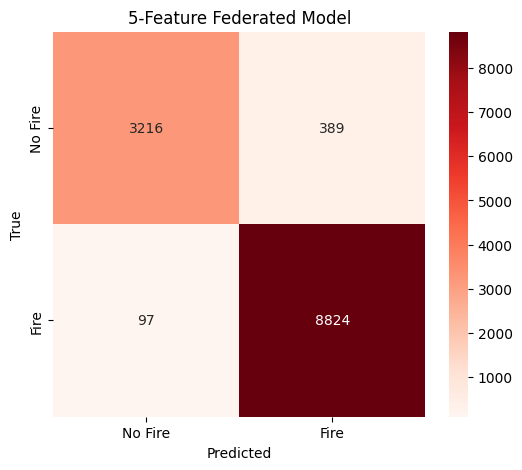


--- Client Reports ---
{'0.0': {'precision': 0.9659835199661948, 'recall': 0.9641501476170392, 'f1-score': 0.965065963060686, 'support': 4742.0}, '1.0': {'precision': 0.9857954545454546, 'recall': 0.9865373358976504, 'f1-score': 0.9861662556944039, 'support': 11959.0}, 'accuracy': 0.9801808274953595, 'macro avg': {'precision': 0.9758894872558247, 'recall': 0.9753437417573447, 'f1-score': 0.975616109377545, 'support': 16701.0}, 'weighted avg': {'precision': 0.9801701510441762, 'recall': 0.9801808274953595, 'f1-score': 0.9801751421282049, 'support': 16701.0}}
{'0.0': {'precision': 0.9859943977591037, 'recall': 0.9786142001710864, 'f1-score': 0.9822904368358913, 'support': 4676.0}, '1.0': {'precision': 0.9917081260364843, 'recall': 0.9945945945945946, 'f1-score': 0.9931492630267802, 'support': 12025.0}, 'accuracy': 0.990120352074726, 'macro avg': {'precision': 0.988851261897794, 'recall': 0.9866043973828404, 'f1-score': 0.9877198499313358, 'support': 16701.0}, 'weighted avg': {'precision

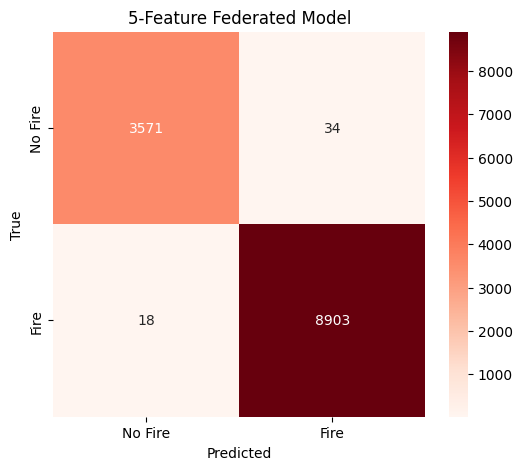


--- Client Reports ---
{'0.0': {'precision': 0.9940703091910208, 'recall': 0.9898776887389287, 'f1-score': 0.9919695688926459, 'support': 4742.0}, '1.0': {'precision': 0.995992987728525, 'recall': 0.9976586671126348, 'f1-score': 0.9968251315899407, 'support': 11959.0}, 'accuracy': 0.9954493742889647, 'macro avg': {'precision': 0.9950316484597729, 'recall': 0.9937681779257818, 'f1-score': 0.9943973502412933, 'support': 16701.0}, 'weighted avg': {'precision': 0.9954470718178103, 'recall': 0.9954493742889647, 'f1-score': 0.9954464669404843, 'support': 16701.0}}
{'0.0': {'precision': 0.99548289954829, 'recall': 0.9897348160821214, 'f1-score': 0.9926005361930295, 'support': 4676.0}, '1.0': {'precision': 0.9960172585462994, 'recall': 0.9982536382536382, 'f1-score': 0.9971341944594426, 'support': 12025.0}, 'accuracy': 0.9958685108676127, 'macro avg': {'precision': 0.9957500790472946, 'recall': 0.9939942271678799, 'f1-score': 0.9948673653262361, 'support': 16701.0}, 'weighted avg': {'precisio

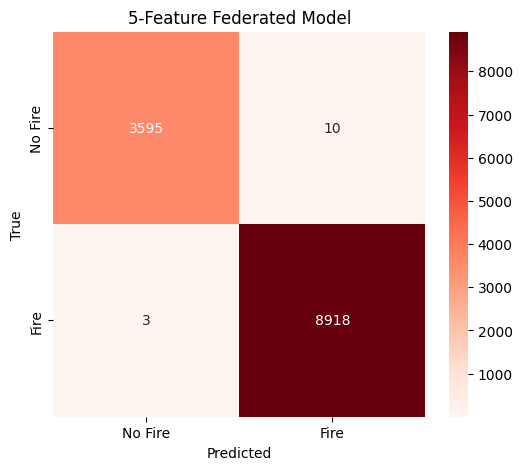


--- Client Reports ---
{'0.0': {'precision': 0.9997887621461766, 'recall': 0.9981020666385492, 'f1-score': 0.9989447024060785, 'support': 4742.0}, '1.0': {'precision': 0.9992479318124843, 'recall': 0.9999163809683084, 'f1-score': 0.9995820446376327, 'support': 11959.0}, 'accuracy': 0.9994012334590743, 'macro avg': {'precision': 0.9995183469793305, 'recall': 0.9990092238034287, 'f1-score': 0.9992633735218556, 'support': 16701.0}, 'weighted avg': {'precision': 0.9994014925239608, 'recall': 0.9994012334590743, 'f1-score': 0.9994010808113929, 'support': 16701.0}}
{'0.0': {'precision': 0.9995721925133689, 'recall': 0.9993584260051326, 'f1-score': 0.9994652978291092, 'support': 4676.0}, '1.0': {'precision': 0.9997505404955929, 'recall': 0.9998336798336799, 'f1-score': 0.9997921084362397, 'support': 12025.0}, 'accuracy': 0.9997006167295371, 'macro avg': {'precision': 0.9996613665044809, 'recall': 0.9995960529194062, 'f1-score': 0.9996287031326745, 'support': 16701.0}, 'weighted avg': {'preci

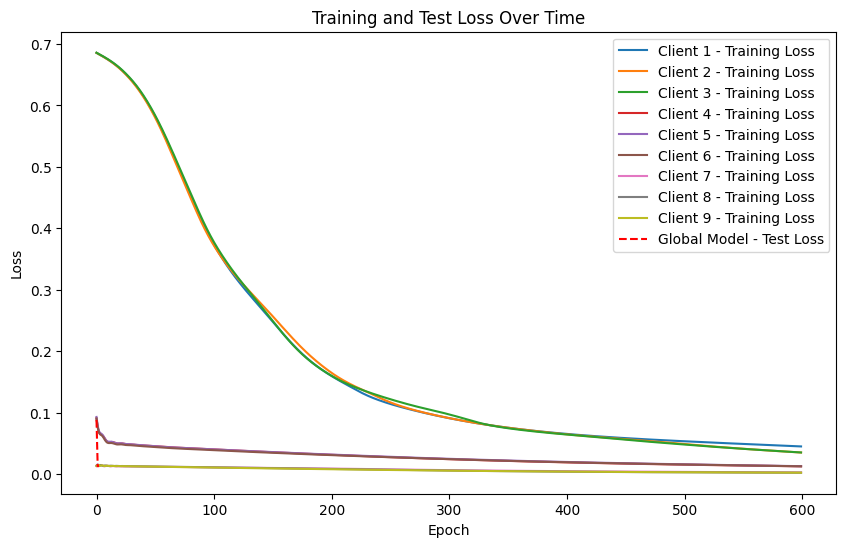

Accuracy: 0.9989621587098835
Precision: 0.9988799283154122
Recall: 0.999663714830176
F1: 0.9992716678805535
Confusion_matrix:
[[3595   10]
 [   3 8918]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3595   10]
 [   3 8918]]


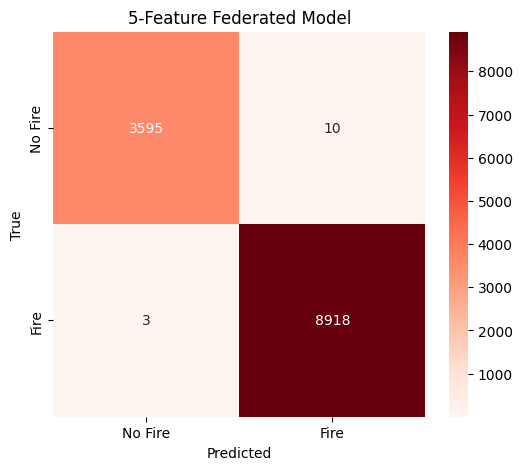

In [9]:
remaining_features_2 = list(remaining_features)
remaining_features_2.append(ranking.index[5])
X_5f = data[remaining_features_2]
X_train_5f, X_test_5f, Y_train_5f, Y_test_5f = train_test_split(X_5f.values, Y_raw, test_size=0.2, random_state=0)

# Introduce sensor errors

VOC_features = [
    'TVOC[ppb]',
    'eCO2[ppm]',
    'Raw H2',
    'Raw Ethanol'
]

PM_features = [
    'PM1.0',
    'PM2.5',
    'NC0.5',
    'NC1.0',
    'NC2.5'
]

th_features = [
    'Temperature[C]',
    'Humidity[%]'
]
pressure_features = [
    'Pressure[hPa]'
]

# For each measurement, each sensor has this chance of introducing an error
error_chance = 0.2

# The PM sensor is twice as likely to fail due to lack of redundancy
chances = [error_chance, error_chance*2, error_chance, error_chance]
sensors = [VOC_features, PM_features, th_features, pressure_features]

error_mask = np.ones(X_5f.shape)

X_error_np = X_5f.values.copy()
for i, datapoint in enumerate(X_5f.values):
    errored_features = []
    for j, sensor in enumerate(sensors):
        sensor_error = random.random() < chances[j]
        if sensor_error:
            errored_features.extend(sensor)
    errored_features = [feature for feature in errored_features if feature in X_5f.columns]
    if errored_features:
        for feature in errored_features:
            X_error_np[i][X_5f.columns.get_loc(feature)] = np.nan
        # print(i, X_error_np[i])

scaler = StandardScaler()
X_train_5f = scaler.fit_transform(X_train_5f)
X_test_5f = scaler.transform(X_test_5f)

X_train_5f_device = torch.tensor(X_train_raw, dtype=torch.float32)
X_test_5f_device = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train_5f_device = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test_5f_device = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

dropped5f_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

dropped5f_federated = FederatedLearning(dropped5f_global_model, n_clients=3)

dropped5f_federated.split_data(X_train_5f_device, Y_train_5f_device)
dropped5f_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test_5f_device,Y_test=Y_test_5f_device, conf_title="5-Feature Federated Model")

dropped5f_federated.evaluate_global_model(X_test_5f_device, Y_test_5f_device, "5-Feature Federated Model")

In [11]:
AlarmNet.compare_results(dropped5f_global_model.get_results(), full_global_model.get_results())

Comparing results:
accuracy: 0.039958443219057796 %
precision: 0.06713910097758923 %
recall: -0.011213276519390537 %
f1: 0.0279936283269056 %


--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.4540
Client 1 - Epoch 200/600, Loss: 0.2524
Client 1 - Epoch 300/600, Loss: 0.1960
Client 1 - Epoch 400/600, Loss: 0.1735
Client 1 - Epoch 500/600, Loss: 0.1563
Client 1 - Epoch 600/600, Loss: 0.1399
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9514995313964386, 'recall': 0.8563897089835513, 'f1-score': 0.9014428412874583, 'support': 4742.0}, '1.0': {'precision': 0.9452264135767715, 'recall': 0.9826908604398361, 'f1-score': 0.9635946211872746, 'support': 11959.0}, 'accuracy': 0.9468295311657985, 'macro avg': {'precision': 0.9483629724866051, 'recall': 0.9195402847116937, 'f1-score': 0.9325187312373664, 'support': 16701.0}, 'weighted avg': {'precision': 0.9470075718727334, 'recall': 0.9468295311657985, 'f1-score': 0.9459475497373657, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4061   681]
 [  207 11752]]
Client 2 - Epoch 100/600, Loss: 0.4538
Client 2 - Epoch 200/6

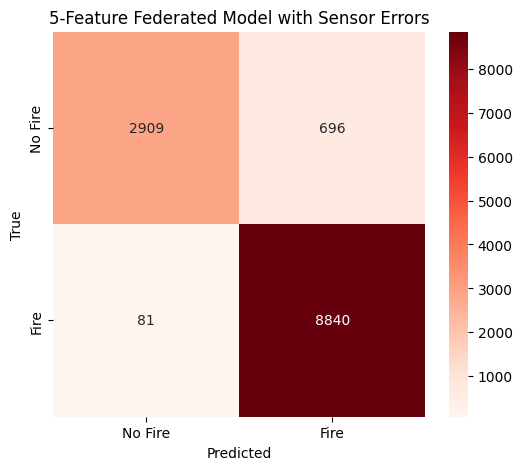


--- Client Reports ---
{'0.0': {'precision': 0.9514995313964386, 'recall': 0.8563897089835513, 'f1-score': 0.9014428412874583, 'support': 4742.0}, '1.0': {'precision': 0.9452264135767715, 'recall': 0.9826908604398361, 'f1-score': 0.9635946211872746, 'support': 11959.0}, 'accuracy': 0.9468295311657985, 'macro avg': {'precision': 0.9483629724866051, 'recall': 0.9195402847116937, 'f1-score': 0.9325187312373664, 'support': 16701.0}, 'weighted avg': {'precision': 0.9470075718727334, 'recall': 0.9468295311657985, 'f1-score': 0.9459475497373657, 'support': 16701.0}}
{'0.0': {'precision': 0.9554761904761905, 'recall': 0.8582121471343028, 'f1-score': 0.9042361424064894, 'support': 4676.0}, '1.0': {'precision': 0.9469642428605711, 'recall': 0.9844490644490644, 'f1-score': 0.9653429014107477, 'support': 12025.0}, 'accuracy': 0.9491048440213161, 'macro avg': {'precision': 0.9512202166683807, 'recall': 0.9213306057916837, 'f1-score': 0.9347895219086186, 'support': 16701.0}, 'weighted avg': {'preci

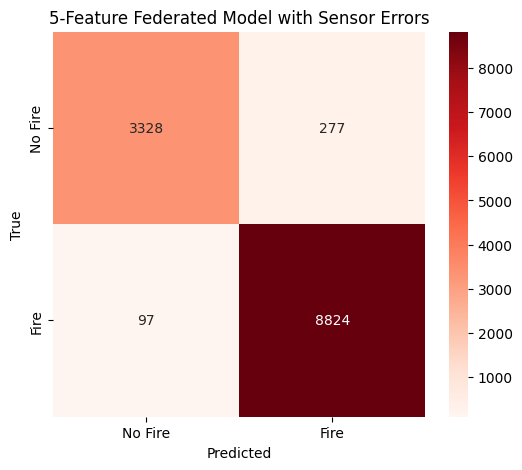


--- Client Reports ---
{'0.0': {'precision': 0.9744233843343229, 'recall': 0.8998312948123155, 'f1-score': 0.935643021598509, 'support': 4742.0}, '1.0': {'precision': 0.9614510631391008, 'recall': 0.9906346684505394, 'f1-score': 0.9758247189160248, 'support': 11959.0}, 'accuracy': 0.9648524040476618, 'macro avg': {'precision': 0.9679372237367119, 'recall': 0.9452329816314274, 'f1-score': 0.9557338702572669, 'support': 16701.0}, 'weighted avg': {'precision': 0.965134360373263, 'recall': 0.9648524040476618, 'f1-score': 0.9644157249228712, 'support': 16701.0}}
{'0.0': {'precision': 0.9794646977388094, 'recall': 0.9078272027373824, 'f1-score': 0.9422863485016648, 'support': 4676.0}, '1.0': {'precision': 0.9651491873534406, 'recall': 0.9925987525987526, 'f1-score': 0.9786815349294851, 'support': 12025.0}, 'accuracy': 0.9688641398718639, 'macro avg': {'precision': 0.972306942546125, 'recall': 0.9502129776680674, 'f1-score': 0.9604839417155749, 'support': 16701.0}, 'weighted avg': {'precisio

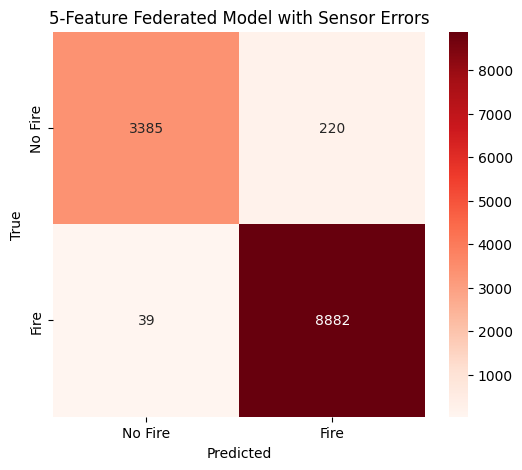


--- Client Reports ---
{'0.0': {'precision': 0.982773851590106, 'recall': 0.9384226064951497, 'f1-score': 0.9600862998921251, 'support': 4742.0}, '1.0': {'precision': 0.9760124866507845, 'recall': 0.9934777155280542, 'f1-score': 0.9846676611967512, 'support': 11959.0}, 'accuracy': 0.9778456379857493, 'macro avg': {'precision': 0.9793931691204453, 'recall': 0.9659501610116019, 'f1-score': 0.9723769805444382, 'support': 16701.0}, 'weighted avg': {'precision': 0.9779322754384179, 'recall': 0.9778456379857493, 'f1-score': 0.9776881500712774, 'support': 16701.0}}
{'0.0': {'precision': 0.9857556198531048, 'recall': 0.9471770744225834, 'f1-score': 0.9660813611080816, 'support': 4676.0}, '1.0': {'precision': 0.9797673656618611, 'recall': 0.9946777546777547, 'f1-score': 0.9871662608839187, 'support': 12025.0}, 'accuracy': 0.981378360577211, 'macro avg': {'precision': 0.9827614927574829, 'recall': 0.970927414550169, 'f1-score': 0.9766238109960002, 'support': 16701.0}, 'weighted avg': {'precisio

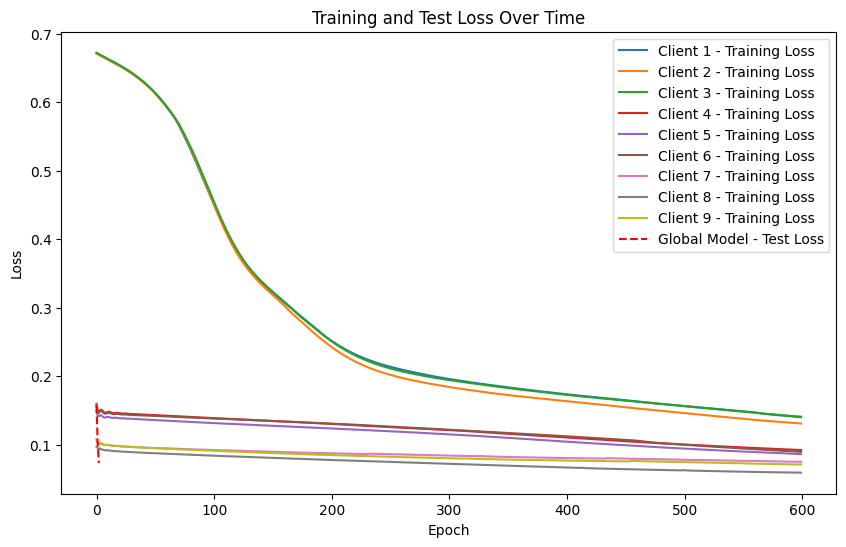

Accuracy: 0.9793230081430624
Precision: 0.97582948802461
Recall: 0.9956282927922878
F1: 0.9856294734505909
Confusion_matrix:
[[3385  220]
 [  39 8882]]
Classification_report:               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      3605
         1.0       0.98      1.00      0.99      8921

    accuracy                           0.98     12526
   macro avg       0.98      0.97      0.97     12526
weighted avg       0.98      0.98      0.98     12526

Confusion Matrix for Global Model:
[[3385  220]
 [  39 8882]]


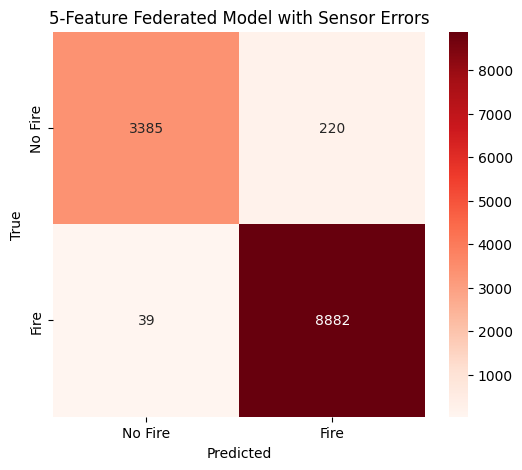

In [12]:
from sklearn.impute import SimpleImputer
X_error_train, X_error_test, Y_error_train, Y_error_test = train_test_split(X_error_np, Y_raw, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy='median')
#imputer.fit(X_5f.values)
imputer.fit(X_error_train)
X_impute_train = imputer.transform(X_error_train)
X_impute_test = imputer.transform(X_error_test)
scaler = StandardScaler()
X_impute_train = scaler.fit_transform(X_impute_train)
X_impute_test = scaler.transform(X_impute_test)

X_error_train_device = torch.tensor(X_impute_train, dtype=torch.float32)
X_error_test_device = torch.tensor(X_impute_test, dtype=torch.float32)
Y_error_train_device = torch.tensor(Y_error_train, dtype=torch.float32).reshape(-1, 1)
Y_error_test_device = torch.tensor(Y_error_test, dtype=torch.float32).reshape(-1, 1)

global_error_model = AlarmNet(num_features=X_error_train.shape[1], hidden_layers=[32, 16, 8])

error_federated = FederatedLearning(global_error_model, n_clients=3)
error_federated.split_data(X_error_train_device, Y_error_train_device)
error_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_error_test_device,Y_test=Y_error_test_device, conf_title="5-Feature Federated Model with Sensor Errors")
error_federated.evaluate_global_model(X_error_test_device, Y_error_test_device, "5-Feature Federated Model with Sensor Errors")

In [14]:
AlarmNet.compare_results(global_error_model.get_results(), dropped5f_global_model.get_results())

Comparing results:
accuracy: -2.005380288579122 %
precision: -2.362138116717871 %
recall: -0.4053141184417999 %
f1: -1.384109830056385 %
